In [1]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from yellowbrick.regressor import residuals_plot
from yellowbrick.model_selection import FeatureImportances


x_data = pd.read_csv("source.csv").drop(columns=[
    "sofifa_id",
    "GK",
    "value_eur",
    "international_reputation",
    "overall",
    "potential",
    "data_year",
    "wage_eur"
])
y_data = pd.read_csv("target_wage.csv")
y_data = y_data.to_numpy() /1000

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

{'metric': 'manhattan', 'n_neighbors': 17}


<AxesSubplot:>

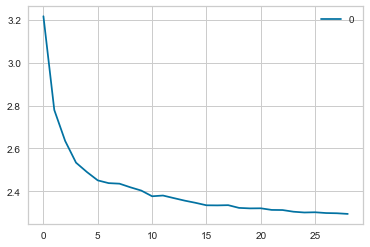

In [7]:
params = {'n_neighbors': [*range(1, 30, 2)], "metric": ["manhattan", "minkowski"]}

knn = KNeighborsRegressor()
model = GridSearchCV(knn, params,scoring="r2", cv=5)
model.fit(x_train, y_train)
print(model.best_params_)

rmse_val = []  #to store rmse values for different k
for K in range(1, 30, 1):
    model = KNeighborsRegressor(n_neighbors=K, metric='manhattan')

    model.fit(x_train, y_train)  #fit the model
    predictions = model.predict(x_test)  #make prediction on test set
    error = mean_absolute_error(y_test, predictions)
    rmse_val.append(error)  #store rmse values

#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val)  #elbow curve
curve.plot()

<AxesSubplot:title={'center':'The error as the neighbours increase for the Wage'}, xlabel='Neighbours', ylabel='MAE'>

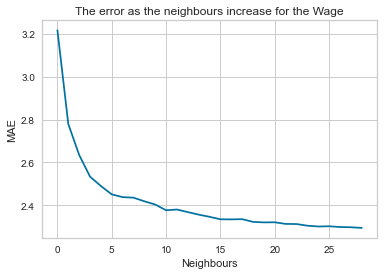

In [8]:
curve.plot(ylabel="MAE", legend=False, xlabel="Neighbours", title="The error as the neighbours increase for the Wage")



mse 21.487512543865083
mae 2.334427397332559
RMSE 4.635462495141675
MAPE 155051820720031.12
R2 0.1560467848931364


C:\Users\omerkati\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  warnings.warn(


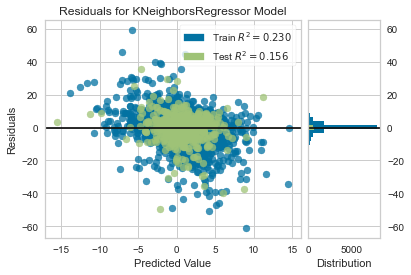

In [5]:
model = KNeighborsRegressor(n_neighbors=17, metric="manhattan")
model.fit(x_train, y_train)  #fit the model
predictions = model.predict(x_test)  #make prediction on test set
error = mean_squared_error(y_test, predictions)
print("mse", mean_squared_error(y_test, predictions))
print("mae", mean_absolute_error(y_test, predictions))
print("RMSE", mean_squared_error(y_test, predictions, squared=False))
print("MAPE", mean_absolute_percentage_error(y_test, predictions))
print("R2", r2_score(y_test, predictions))

viz = residuals_plot(model, x_train, y_train, x_test, y_test)


In [20]:
params = {'max_depth': [*range(5, 10, 1)], "n_estimators": [5,10,15,20]}

forest = RandomForestRegressor()
model = GridSearchCV(forest, params, cv=5)
model.fit(x_train, y_train.ravel())
print(model.best_params_)

C:\Users\omerkati\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\omerkati\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\omerkati\AppData\Roaming\Python\Python39\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\omerkati\AppData\Roaming\Python\Python39\site-packages\skl

{'max_depth': 9, 'n_estimators': 15}
{'max_depth': 8, 'n_estimators': 20}
{'max_depth': 7, 'n_estimators': 20}
{'max_depth': 8, 'n_estimators': 20}


C:\Users\omerkati\AppData\Local\Temp\ipykernel_16576\3623169729.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest.fit(x_train, y_train)


mse 17.750767459520954
mae 2.220041364506565
RMSE 4.213165966291971
MAPE 250889123721919.25
R2 0.3028128668921156


C:\Users\omerkati\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


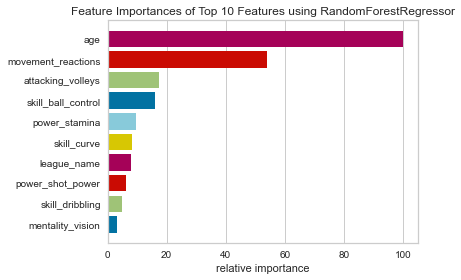

C:\Users\omerkati\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


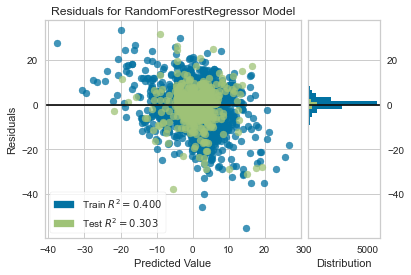

In [3]:
feature_names = x_data.columns.values
forest = RandomForestRegressor(max_depth=5, n_estimators=10)

forest.fit(x_train, y_train)
predictions = forest.predict(x_test)
print("mse", mean_squared_error(y_test, predictions))
print("mae", mean_absolute_error(y_test, predictions))
print("RMSE", mean_squared_error(y_test, predictions, squared=False))
print("MAPE", mean_absolute_percentage_error(y_test, predictions))
print("R2", r2_score(y_test, predictions))

# # Get numerical feature importances
# importances = list(forest.feature_importances_)
# # List of tuples with variable and importance
# feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_names, importances)]
# # Sort the feature importances by most important first
# feature_importances = sorted(feature_importances, key=lambda x: x[1], reverse=True)
# # Print out the feature and importances
# [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

visualizer = FeatureImportances(forest, topn=10)

visualizer.fit(x_data, y_data)
visualizer.show()

viz = residuals_plot(forest, x_train, y_train.ravel(), x_test, y_test.ravel())


(1911, 53) (1911, 1)
mse 21.16446465292859
mae 2.5849936648680956
RMSE 4.600485262766156
MAPE 572204357999909.5
R2 0.16873495927501414


C:\Users\omerkati\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Program Files\Python39\lib\site-packages\yellowbrick\model_selection\importances.py:194: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  warnings.warn(


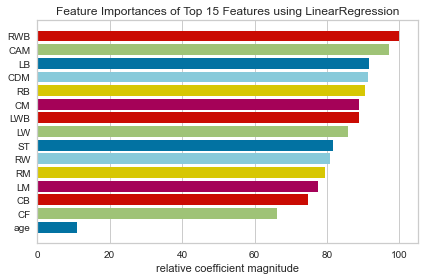

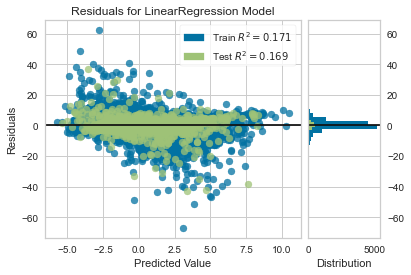

In [4]:
from sklearn.linear_model import LinearRegression

print(x_test.shape,y_test.shape)
linreg = LinearRegression()


linreg.fit(x_train, y_train)
predictions = linreg.predict(x_test)
print("mse",mean_squared_error(y_test,predictions))
print("mae",mean_absolute_error(y_test,predictions))
print("RMSE", mean_squared_error(y_test, predictions, squared=False))
print("MAPE", mean_absolute_percentage_error(y_test, predictions))
print("R2", r2_score(y_test, predictions))

visualizer = FeatureImportances(linreg, topn=15)

visualizer.fit(x_data, y_data)
visualizer.show();

viz = residuals_plot(LinearRegression(), x_train, y_train, x_test, y_test)